In [1]:
# Import necessary Libraries and classes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [2]:
# Define function to add labels to each bar in a bar plot
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [3]:
#Load the Mnist dataset
mnist_bruno = fetch_openml('mnist_784', version = 1)
mnist_bruno.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
# Store features and targets into their respective variables
X_bruno, y_bruno = mnist_bruno.data, mnist_bruno.target
X_bruno.dtypes

pixel1      float64
pixel2      float64
pixel3      float64
pixel4      float64
pixel5      float64
             ...   
pixel780    float64
pixel781    float64
pixel782    float64
pixel783    float64
pixel784    float64
Length: 784, dtype: object

### Initiate brief exploratory analysis

In [5]:
type(X_bruno)

pandas.core.frame.DataFrame

In [6]:
X_bruno.shape

(70000, 784)

#### The features matrix has 70,000 instances and 784 columns

In [7]:
# The dataset originally contains 10 different classes
y_bruno.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [8]:
type(y_bruno)

pandas.core.series.Series

In [9]:
y_bruno.shape

(70000,)

In [10]:
# Store three samples in variables to be used latter for prediction
some_digit1, some_digit2, some_digit3 = X_bruno.iloc[7], X_bruno.iloc[5], X_bruno.iloc[0]
some_digit1

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 7, Length: 784, dtype: float64

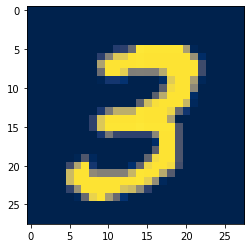

In [11]:
# Plot the Variables
some_digit1_image = some_digit1.values.reshape(28, 28)
some_digit2_image = some_digit2.values.reshape(28, 28)
some_digit3_image = some_digit3.values.reshape(28, 28)

plt.imshow(some_digit1_image, cmap='cividis')
plt.show()

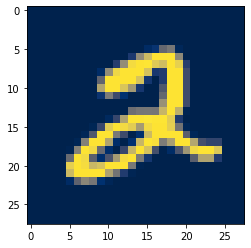

In [12]:
plt.imshow(some_digit2_image, cmap='cividis')
plt.show()

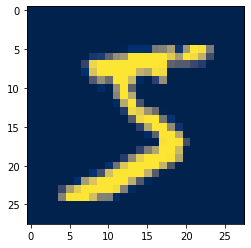

In [13]:
plt.imshow(some_digit3_image, cmap='cividis')
plt.show()

In [14]:
# Change target variables from categorical to numerical
y_bruno = y_bruno.astype(np.uint8)
y_bruno[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: uint8

In [15]:
# Reduce the number of target variables from 10 to 3 by packing them into groups
y_bruno = np.where(y_bruno < 4, 0, np.where(((y_bruno >= 4) & (y_bruno <7)), 1, 9))
y_bruno = pd.Series(y_bruno)
y_bruno[:5]

0    1
1    0
2    1
3    0
4    9
dtype: int64

In [16]:
# Checking if the grouping was performed correctly
pd.Series(y_bruno).unique()

array([1, 0, 9])

In [17]:
# Frequency of the new target variables
y_bruno.value_counts()

0    28911
9    21076
1    20013
dtype: int64

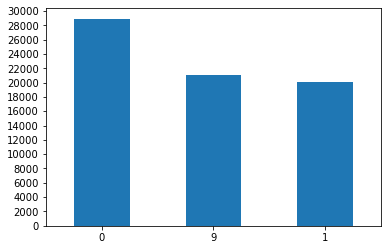

In [18]:
# Bar chart to better viaulize the frequency of each new class
y_bruno.value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 30001, step=2000))
plt.show()

`Imbalanced classes`

In [19]:
# Split the dataset into train and test. The dataset is already shuffled
X_bruno_train, X_bruno_test, y_bruno_train, y_bruno_test = X_bruno[:50000], X_bruno[50000:], y_bruno[:50000], y_bruno[50000:]

## Naïve Bayes

In [20]:
# Instantiate different implementations of the Naive Bayes Classification algorithm

'''Implements the naive Bayes training and classification algorithms for data that
is distributed according to multivariate Bernoulli distributions'''
NB_Bernoulli_clf_bruno = BernoulliNB()

'''implements the naive Bayes algorithm for multinomially distributed data,
and is one of the two classic naive Bayes variants used in text classification'''
NB_MulinomialNB_clf_bruno = MultinomialNB()

'''implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation
of the standard multinomial naive Bayes (MNB) algorithm that is particularlysuited for imbalanced data sets.'''
NB_ComplementNB_clf_bruno = ComplementNB()

'''implements the Gaussian Naive Bayes algorithm for classification.
The likelihood of the features is assumed to be Gaussian.'''
NB_GaussianNB_clf_bruno = GaussianNB()

In [21]:
# Scores for Bernoulli implementation using 3-fold cross-validation
scores_Bernoulli = cross_val_score(NB_Bernoulli_clf_bruno, X_bruno_train, y_bruno_train, cv=3)

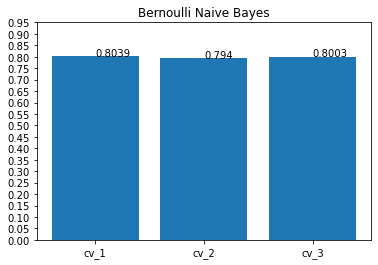

In [22]:
x = ['cv_1', 'cv_2', 'cv_3']
plt.bar(x, scores_Bernoulli)
plt.yticks(np.arange(0, 1, step=0.05))
add_labels(x, np.round(scores_Bernoulli, 4))
plt.title('Bernoulli Naive Bayes')
plt.show()

In [23]:
print(f"Mean score of Bernoulli's CV: {round(scores_Bernoulli.mean()*100, 4)}%")

Mean score of Bernoulli's CV: 79.942%


In [24]:
# Scores for Multinomial implementation using 3-fold cross-validation
scores_Multinomial = cross_val_score(NB_MulinomialNB_clf_bruno, X_bruno_train, y_bruno_train, cv=3)

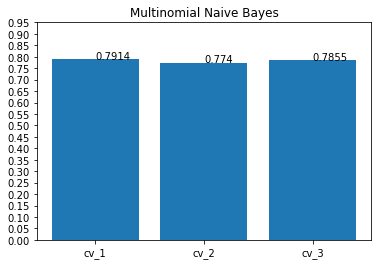

In [25]:
plt.bar(x, scores_Multinomial)
plt.yticks(np.arange(0, 1, step=0.05))
add_labels(x, np.round(scores_Multinomial, 4))
plt.title('Multinomial Naive Bayes')
plt.show()

In [26]:
print(f"Mean score of Multinomial's CV: {round(scores_Multinomial.mean()*100, 4)}%")

Mean score of Multinomial's CV: 78.364%


In [27]:
# Scores for Complement implementation using 3-fold cross-validation
scores_Complement = cross_val_score(NB_ComplementNB_clf_bruno, X_bruno_train, y_bruno_train, cv=3)

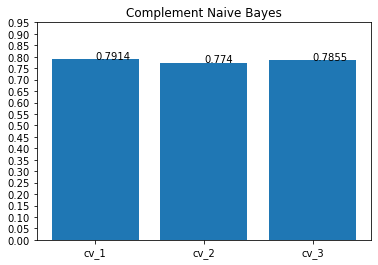

In [28]:
plt.bar(x, scores_Multinomial)
plt.yticks(np.arange(0, 1, step=0.05))
add_labels(x, np.round(scores_Multinomial, 4))
plt.title('Complement Naive Bayes')
plt.show()

In [29]:
print(f"Mean score of Complement's CV: {round(scores_Complement.mean()*100, 4)}%")

Mean score of Complement's CV: 78.072%


In [30]:
# Scores for Gaussian implementation using 3-fold cross-validation
scores_Gaussian = cross_val_score(NB_GaussianNB_clf_bruno, X_bruno_train, y_bruno_train, cv=3)

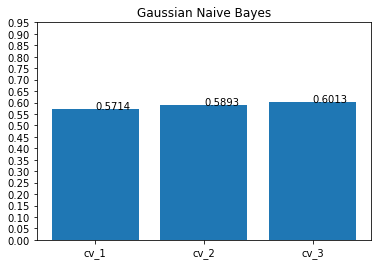

In [31]:
plt.bar(x, scores_Gaussian)
plt.yticks(np.arange(0, 1, step=0.05))
add_labels(x, np.round(scores_Gaussian, 4))
plt.title('Gaussian Naive Bayes')
plt.show()

In [32]:
print(f"Mean score of Gaussian's CV: {round(scores_Gaussian.mean()*100, 4)}%")

Mean score of Gaussian's CV: 58.734%


### Given the best score achieve in cross-validation, we chose Bernoulli to fit the training data.

In [33]:
#Choose Naive Bayes Bernoulli algorithm
NB_Bernoulli_clf_bruno.fit(X_bruno_train.values, y_bruno_train)

BernoulliNB()

In [34]:
# Predictions using Cross Validation and Training data
y_train_bernoulli_pred = cross_val_predict(NB_Bernoulli_clf_bruno, X_bruno_train, y_bruno_train, cv=3)

In [35]:
cf = confusion_matrix(y_bruno_train, y_train_bernoulli_pred)
print(cf)

[[17791  1597  1291]
 [ 1880  9989  2447]
 [ 1910   904 12191]]


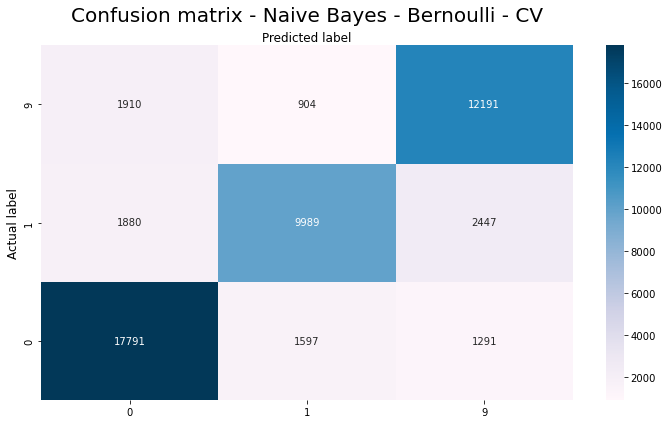

In [36]:
#Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10,6))
# create heatmap
sns.heatmap(cf, annot=True,cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,3])
ax.xaxis.set_ticklabels(['0','1', '9'])
ax.yaxis.set_ticklabels(['0','1', '9'])
plt.title('Confusion matrix - Naive Bayes - Bernoulli - CV',fontsize=20, pad=10.0)
plt.ylabel('Actual label', fontsize='large')
plt.xlabel('Predicted label', fontsize='large')
plt.tight_layout()

In [37]:
print(classification_report(y_bruno_train, y_train_bernoulli_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     20679
           1       0.80      0.70      0.75     14316
           9       0.77      0.81      0.79     15005

    accuracy                           0.80     50000
   macro avg       0.80      0.79      0.79     50000
weighted avg       0.80      0.80      0.80     50000



precision means what percentage of the positive predictions made were actually correct.

`TP/(TP+FP)`

Recall in simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.

`TP/(TP+FN)`

F1 score can also be described as the harmonic mean or weighted average of precision and recall.

`2x((precision x recall) / (precision + recall))`

In [38]:
#Predictions With Bernoulli's using test dataset
y_bernoulli_pred = NB_Bernoulli_clf_bruno.predict(X_bruno_test.values)

In [39]:
print(f"Bernoulli's accuracy: {round(NB_Bernoulli_clf_bruno.score(X_bruno_test.values, y_bruno_test)*100, 4)}%")

Bernoulli's accuracy: 80.5%


In [40]:
cf = confusion_matrix(y_bruno_test, y_bernoulli_pred)

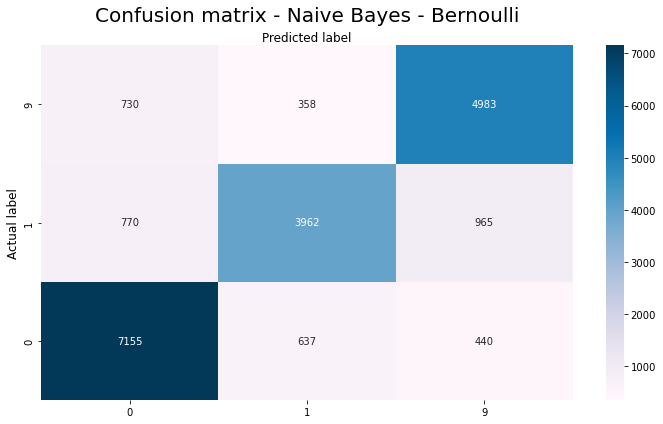

In [41]:
#Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10,6))
# create heatmap
sns.heatmap(cf, annot=True,cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,3])
ax.xaxis.set_ticklabels(['0','1', '9'])
ax.yaxis.set_ticklabels(['0','1', '9'])
plt.title('Confusion matrix - Naive Bayes - Bernoulli',fontsize=20, pad=10.0)
plt.ylabel('Actual label', fontsize='large')
plt.xlabel('Predicted label', fontsize='large')
plt.tight_layout()

In [42]:
# Classification report for Naive Bayes - Bernoulli Implementation.
# Test Dataset
print(classification_report(y_bruno_test, y_bernoulli_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      8232
           1       0.80      0.70      0.74      5697
           9       0.78      0.82      0.80      6071

    accuracy                           0.81     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.81      0.80     20000



precision means what percentage of the positive predictions made were actually correct.

`TP/(TP+FP)`

Recall in simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.

`TP/(TP+FN)`

F1 score can also be described as the harmonic mean or weighted average of precision and recall.

`2x((precision x recall) / (precision + recall))`

### Using Cross-Validation prediction to test the Multinomial Implementation

In [43]:
y_train_multinomial_pred = cross_val_predict(NB_MulinomialNB_clf_bruno, X_bruno_train, y_bruno_train, cv=3)

In [44]:
print(classification_report(y_bruno_train, y_train_multinomial_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83     20679
           1       0.79      0.67      0.73     14316
           9       0.72      0.82      0.77     15005

    accuracy                           0.78     50000
   macro avg       0.78      0.78      0.78     50000
weighted avg       0.79      0.78      0.78     50000



#### As expected, the Multinomial implementation yields worse results than Bernoulli

In [45]:
# Using Naive Bayes - Bernoulli implementation to predict the three digits reserved earlier
y_pred = NB_Bernoulli_clf_bruno.predict([some_digit1, some_digit2, some_digit3])

In [46]:
print(y_bruno[[7, 5, 0]])

7    0
5    0
0    1
dtype: int64


In [47]:
pred_real = pd.DataFrame({'y_real': y_bruno[[7, 5, 0]].to_numpy(), 'y_pred': y_pred}, index = ['some_digit1', 'some_digit2', 'some_digit3'])

In [48]:
# The model was not capable of predicting the correct class for the third digit
print(pred_real)

             y_real  y_pred
some_digit1       0       0
some_digit2       0       0
some_digit3       1       0


## Logistic Regression

### Solver = 'lbfgs'

In [49]:
# Building a Logistic Regression model using the 'lbfgs' algorithm for optimization
LR_clf_bruno = LogisticRegression(solver='lbfgs', tol = 0.1, max_iter=1200, multi_class = 'multinomial')

In [50]:
LR_clf_bruno.fit(X_bruno_train.values, y_bruno_train)

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Assignments/Assignment1/assignment_classification_2022/BrunoMorgado_assignment_classification_2022/conda-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1200, multi_class='multinomial', tol=0.1)

#### The algorithm failed to minimize the cost function after 1,200 iterations

In [51]:
#3-fold cross-validation
LR_lbfgs_scores = cross_val_score(LR_clf_bruno, X_bruno_train.values, y_bruno_train, cv=3)

/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Assignments/Assignment1/assignment_classification_2022/BrunoMorgado_assignment_classification_2022/conda-env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Assignments/Assignment1/assignment_classification_2022/BrunoMorgado_assignment_classification_2022/conda-env/lib/python3.9/site-packages/sklearn/linea

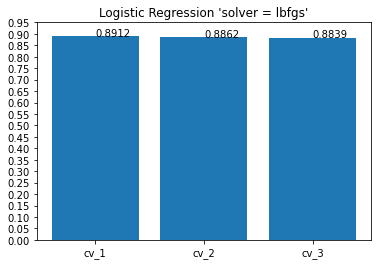

In [52]:
# Scores obtained from cross-validation
plt.bar(x, LR_lbfgs_scores)
plt.yticks(np.arange(0, 1, step=0.05))
add_labels(x, np.round(LR_lbfgs_scores, 4))
plt.title("Logistic Regression 'solver = lbfgs'")
plt.show()

#### Despite the fact that the algorithm was not able to converge to the minimum cost, it still yelds a much better result than Naïve Bayes

In [53]:
# The Logistic Regression model (solver = 'lbfgs')achieves a much higher accuracy than the Naive Bayes Models
print(f"Mean score of LR's CV: {round(LR_lbfgs_scores.mean()*100, 4)}%")

Mean score of LR's CV: 88.712%


In [54]:
# Making predictions with the test dataset
LR_lbfgs_pred = LR_clf_bruno.predict(X_bruno_test.values)

In [55]:
# Higher score in the test dataset, indicating that the model generalizes well.
LR_clf_bruno.score(X_bruno_test.values, y_bruno_test)

0.8953

In [56]:
#Confusion Matrix ('lbfgs')
LR_lbfgs_cf_bruno = confusion_matrix(y_bruno_test, LR_lbfgs_pred)

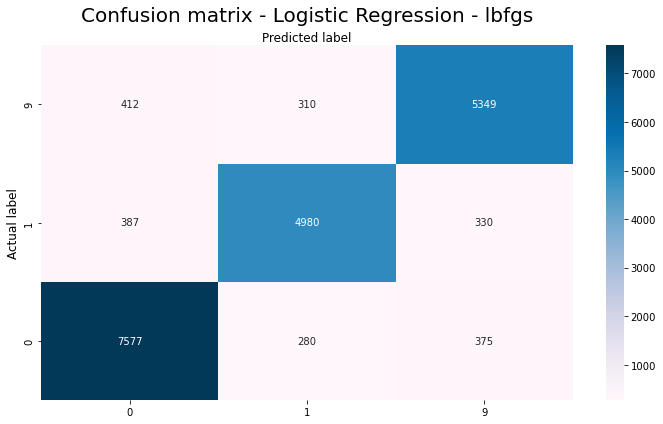

In [57]:
#Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10,6))
# create heatmap
sns.heatmap(LR_lbfgs_cf_bruno, annot=True,cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,3])
ax.xaxis.set_ticklabels(['0','1', '9'])
ax.yaxis.set_ticklabels(['0','1', '9'])
plt.title('Confusion matrix - Logistic Regression - lbfgs',fontsize=20, pad=10.0)
plt.ylabel('Actual label', fontsize='large')
plt.xlabel('Predicted label', fontsize='large')
plt.tight_layout()

In [58]:
print('\t\tClassification Report (lbfgs)\n\n', classification_report(y_bruno_test, LR_lbfgs_pred))

		Classification Report (lbfgs)

               precision    recall  f1-score   support

           0       0.90      0.92      0.91      8232
           1       0.89      0.87      0.88      5697
           9       0.88      0.88      0.88      6071

    accuracy                           0.90     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.90      0.90      0.90     20000



precision means what percentage of the positive predictions made were actually correct.

`TP/(TP+FP)`

Recall in simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.

`TP/(TP+FN)`

F1 score can also be described as the harmonic mean or weighted average of precision and recall.

`2x((precision x recall) / (precision + recall))`

In [59]:
# Using the Logistic Regression Model to predict the labels for the reserved variables
LR_lbfgs_pred_some = LR_clf_bruno.predict([some_digit1, some_digit2, some_digit3])

In [60]:
LR_lbfgs_pred_real = pd.DataFrame({'y_real': y_bruno[[7, 5, 0]].to_numpy(), 'y_pred': LR_lbfgs_pred_some}, index = ['some_digit1', 'some_digit2', 'some_digit3'])

In [61]:
print(LR_lbfgs_pred_real)

             y_real  y_pred
some_digit1       0       0
some_digit2       0       0
some_digit3       1       0


#### The model could not correctly classify the third digit.

<hr></hr>

### Solver = 'Saga'

In [62]:
# Building a Logistic Regression model using the 'saga' algorithm for optimization
LR_clf_bruno = LogisticRegression(solver='saga', tol = 0.1, max_iter=1200, multi_class = 'multinomial')

In [63]:
LR_clf_bruno.fit(X_bruno_train.values, y_bruno_train)

LogisticRegression(max_iter=1200, multi_class='multinomial', solver='saga',
                   tol=0.1)

In [64]:
# Using cross-validation to get the model's scores
LR_scores = cross_val_score(LR_clf_bruno, X_bruno_train, y_bruno_train, cv=3)

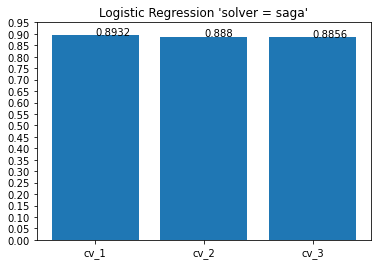

In [65]:
plt.bar(x, LR_scores)
plt.yticks(np.arange(0, 1, step=0.05))
add_labels(x, np.round(LR_scores, 4))
plt.title("Logistic Regression 'solver = saga'")
plt.show()

In [66]:
# The Logistic Regression model (solver = saga) achieves a much higher accuracy than the Naive Bayes Models
print(f"Mean score of LR's CV: {round(LR_scores.mean()*100, 4)}%")

Mean score of LR's CV: 88.894%


In [67]:
# Making predictions with the test dataset
LR_pred = LR_clf_bruno.predict(X_bruno_test.values)

In [68]:
# Some visualization of the predicted versus actual labels
LR_pred_real = pd.DataFrame({'Predicted': LR_pred, 'Test': y_bruno_test.to_numpy(), 'Predicted == Test': LR_pred == y_bruno_test})
print(LR_pred_real)

       Predicted  Test  Predicted == Test
50000          0     0               True
50001          9     9               True
50002          1     1               True
50003          9     9               True
50004          1     1               True
...          ...   ...                ...
69995          0     0               True
69996          0     0               True
69997          1     1               True
69998          1     1               True
69999          1     1               True

[20000 rows x 3 columns]


In [69]:
# Higher score in the test dataset, indicating that the model generalizes well.
LR_clf_bruno.score(X_bruno_test.values, y_bruno_test)

0.89545

In [70]:
LR_cf_bruno = confusion_matrix(y_bruno_test, LR_pred)

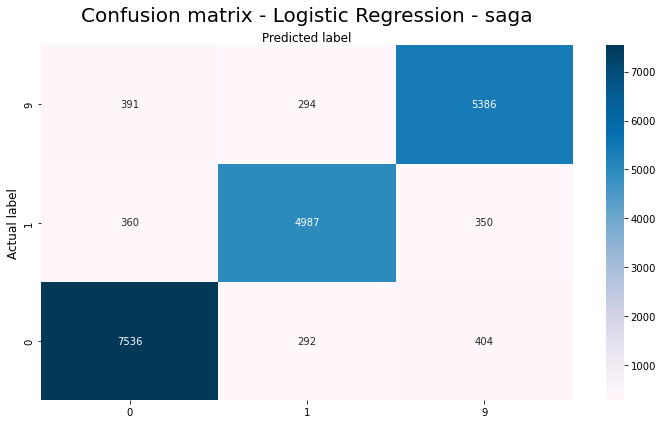

In [71]:
#Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10,6))
# create heatmap
sns.heatmap(LR_cf_bruno, annot=True,cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,3])
ax.xaxis.set_ticklabels(['0','1', '9'])
ax.yaxis.set_ticklabels(['0','1', '9'])
plt.title('Confusion matrix - Logistic Regression - saga',fontsize=20, pad=10.0)
plt.ylabel('Actual label', fontsize='large')
plt.xlabel('Predicted label', fontsize='large')
plt.tight_layout()

In [72]:
print('\t\tClassification Report (saga)\n\n',classification_report(y_bruno_test, LR_pred))

		Classification Report (saga)

               precision    recall  f1-score   support

           0       0.91      0.92      0.91      8232
           1       0.89      0.88      0.89      5697
           9       0.88      0.89      0.88      6071

    accuracy                           0.90     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.90      0.90      0.90     20000



precision means what percentage of the positive predictions made were actually correct.

`TP/(TP+FP)`

Recall in simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.

`TP/(TP+FN)`

F1 score can also be described as the harmonic mean or weighted average of precision and recall.

`2x((precision x recall) / (precision + recall))`

In [73]:
# Using the Logistic Regression Model to predict the labels for the reserved variables
LR_pred_some = LR_clf_bruno.predict([some_digit1, some_digit2, some_digit3])

In [74]:
LR_pred_real = pd.DataFrame({'y_real': y_bruno[[7, 5, 0]].to_numpy(), 'y_pred': LR_pred_some}, index = ['some_digit1', 'some_digit2', 'some_digit3'])

In [75]:
print(LR_pred_real)

             y_real  y_pred
some_digit1       0       0
some_digit2       0       0
some_digit3       1       0


#### Despite the higher accuracy, the Logistic regression model was still not able to predict the third digit correctly

<hr></hr>

### Experimenting with scaled features

In [76]:
scaler = MinMaxScaler()

In [77]:
# Scalling the training features
X_bruno_train_scaled = scaler.fit_transform(X_bruno_train.astype(np.float64))

In [78]:
print(f'MAX: {X_bruno_train_scaled.max()}', f'\nMIN: {X_bruno_train_scaled.min()}')

MAX: 1.0 
MIN: 0.0


In [79]:
# Scalling the test features
X_bruno_test_scaled = scaler.fit_transform(X_bruno_test.astype(np.float64))

In [80]:
print(f'MAX: {X_bruno_test_scaled.max()}', f'\nMIN: {X_bruno_test_scaled.min()}')

MAX: 1.0 
MIN: 0.0


In [81]:
# Fitting the model to the trainning data
LR_clf_bruno.fit(X_bruno_train_scaled, y_bruno_train)

LogisticRegression(max_iter=1200, multi_class='multinomial', solver='saga',
                   tol=0.1)

In [82]:
LR_clf_bruno.score(X_bruno_test_scaled, y_bruno_test)

0.8964

#### It seems that the model fitted to scaled features is marginally more accurate than the previous one.

In [83]:
LR_pred_scaled = LR_clf_bruno.predict(X_bruno_test_scaled)

In [84]:
LR_cf_bruno_scaled = confusion_matrix(y_bruno_test, LR_pred_scaled)

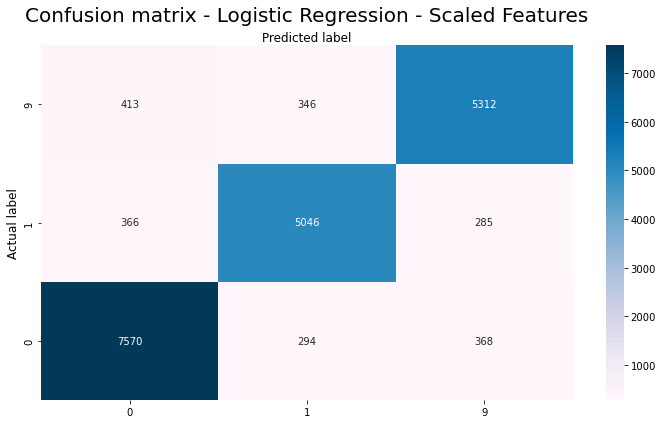

In [85]:
#Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(10,6))
# create heatmap
sns.heatmap(LR_cf_bruno_scaled, annot=True,cmap="PuBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,3])
ax.xaxis.set_ticklabels(['0','1', '9'])
ax.yaxis.set_ticklabels(['0','1', '9'])
plt.title('Confusion matrix - Logistic Regression - Scaled Features',fontsize=20, pad=10.0)
plt.ylabel('Actual label', fontsize='large')
plt.xlabel('Predicted label', fontsize='large')
plt.tight_layout()

In [86]:
print(classification_report(y_bruno_test, LR_pred_scaled))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      8232
           1       0.89      0.89      0.89      5697
           9       0.89      0.87      0.88      6071

    accuracy                           0.90     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.90      0.90      0.90     20000



#### The classification report suggests that the scaled features didn't do much in terms of improving performance

In [87]:
grid={"penalty":["l1","l2"], "C":np.logspace(-3,3,10), "solver": ['lbfgs', 'liblinear', 'saga'], "tol":[0.00001, 0.0001, 0.001, 0.01, 0.1], "multi_class":['multinomial'], "max_iter":[2000]}

### Using GridSearchCV to test multiple combinations of hyperparameters
#### Maximum iterations increased to 2,000

In [88]:
warnings.filterwarnings('ignore')

In [89]:
logreg = LogisticRegression()

In [90]:
logreg_cv=GridSearchCV(logreg,grid,n_jobs = -1, verbose=1, cv=3)

In [91]:
logreg_cv.fit(X_bruno_train_scaled, y_bruno_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


KeyboardInterrupt: 

In [ ]:
# Best hyperparameters
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [ ]:
# Use dill to store the session
import dill

In [ ]:
dill.dump_session('notebook_env.db')

dill.load_session('notebook_env.db')

In [ ]:
# New model with the suggested best combination of hyperparameters
logreg = LogisticRegression(C=10.0, max_iter= 1200, multi_class= 'multinomial', penalty='l2', solver= 'saga', tol= 0.01, verbose=1)

In [ ]:
logreg.fit(X_bruno_train_scaled, y_bruno_train)

In [ ]:
logreg_pred_scaled = logreg.predict(X_bruno_test_scaled)

In [ ]:
logreg.score(X_bruno_test_scaled, y_bruno_test)

#### Still not able to achieve better performance

In [ ]:
print(classification_report(y_bruno_test, logreg_pred_scaled))

### Train the model with original target classes 

In [ ]:
mnist_bruno.data.info()

In [ ]:
mnist_bruno.target.unique()

In [ ]:
# Getting the original features and classes from the dataset
X_new, y_new = mnist_bruno.data, mnist_bruno.target

In [ ]:
X_new.info()

In [ ]:
y_new.info()

In [ ]:
unique, frequency = np.unique(y_new, return_counts=True)

In [ ]:
unique_classes = pd.DataFrame({'Unique NUmbers':unique, 'frequency':frequency})

In [ ]:
unique_classes.plot(kind='bar', legend=False)
plt.show()

In [ ]:
y_new = y_new.astype(np.uint8)

In [ ]:
X_new_train, X_new_test, y_new_train, y_new_test = X_new[:50000], X_new[50000:], y_new[:50000], y_new[50000:]

In [ ]:
# Instantiate the model with the best combination of hyperparameters suggested by GridSearchCV
LR_new = LogisticRegression(C=10.0, max_iter= 1200, multi_class= 'multinomial', penalty='l2', solver= 'saga', tol= 0.01, verbose=0)

In [ ]:
# Scalling trainning features
X_new_train_scaled = scaler.fit_transform(X_new_train.astype(np.float64))

In [ ]:
#Scalling test features
X_new_test_scaled = scaler.fit_transform(X_new_test.astype(np.float64))

In [ ]:
LR_new.fit(X_new_train_scaled, y_new_train)

In [ ]:
LR_new_pred_scaled = LR_new.predict(X_new_test_scaled)

In [ ]:
LR_new.score(X_new_test_scaled, y_new_test)

#### The new score suggests that we were able to improve the model's performance

In [ ]:
LR_new_cf_scaled = confusion_matrix(y_new_test, LR_new_pred_scaled)

In [ ]:
#Plot the confusion Matrix
fig, ax = plt.subplots(figsize=(12,7))
# create heatmap
sns.heatmap(LR_new_cf_scaled, annot=True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
ax.set_ylim([0,10])
ax.xaxis.set_ticklabels(np.arange(0,10,1))
ax.yaxis.set_ticklabels(np.arange(0,10,1))
plt.title('Confusion matrix - Logistic Regression - Original Labels',fontsize=20, pad=10.0)
plt.ylabel('Actual label', fontsize='large')
plt.xlabel('Predicted label', fontsize='large')
plt.tight_layout()

In [ ]:
print(classification_report(y_new_test, LR_new_pred_scaled))

#### The new classification report reinforces the conclusion that we are achieving better performance across the board

In [ ]:
LR_new_pred_some = LR_new.predict([some_digit1, some_digit2, some_digit3])

In [ ]:
LR_new_pred_real = pd.DataFrame({'y_real': y_new[[7, 5, 0]].to_numpy(), 'y_pred': LR_new_pred_some}, index = ['some_digit1', 'some_digit2', 'some_digit3'])

In [ ]:
LR_new_pred_real

#### Even with the improved performance, the model is still not able to differentiate the #5 from #3

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[11,7])
plt.tick_params(left=False)
ax1.imshow(some_digit1_image, cmap='cividis')
ax1.set_title('#3', fontsize = 20, fontweight=800)
ax2.imshow(some_digit3_image, cmap='cividis')
ax2.set_title('#5', fontsize = 20, fontweight=800)
fig.savefig('3VS5.png', dpi=600)
plt.show()

<div align="center" style='font-size:40px; padding:20px 0px'><strong> END </strong></div>